# Credit EDA Analysis

In [4]:
import logging
import pandas as pd
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data module
try:
    from data_loader import load_data
    logger_initialized = True
except ImportError as e:
    logger_initialized = False
    print(f"Error importing 'load_data': {e}")

# Set pandas display options for better visibility
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [5]:
# Configure logging
def setup_logger(name: str = 'my_logger') -> logging.Logger:
    """
    Set up a logger with INFO level and StreamHandler.
    
    Parameters:
    -----------
    name : str
        The name of the logger.
    
    Returns:
    --------
    logging.Logger
        Configured logger instance.
    """
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)
    
    # Prevent duplicate handlers
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
    
    return logger

# Initialize logger
logger = setup_logger()
logger.info("Imported necessary libraries.")

# Check and log if 'load_data' was successfully imported
if logger_initialized:
    logger.info("'load_data' module imported successfully.")
else:
    logger.warning("'load_data' module could not be imported. Check the 'scripts' directory and file availability.")

2025-06-27 08:29:44,920 - INFO - Imported necessary libraries.
2025-06-27 08:29:44,921 - INFO - 'load_data' module imported successfully.


In [9]:
logger.info("🟢 Starting the data loading process...")
df = load_data('../data/data.csv')
if not df.empty:
    logger.info(f"✅ Data loaded successfully! The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
else:
    logger.warning("⚠️ Data loading completed, but the dataset is empty.")

2025-06-27 08:30:13,154 - INFO - 🟢 Starting the data loading process...
2025-06-27 08:30:13,398 - INFO - ✅ Data loaded successfully! The dataset contains 95662 rows and 15 columns.


Data successfully loaded from '../data/data.csv' with 95662 rows and 15 columns.


In [10]:
# Import the class CreditRiskAnalysisEDA
from eda_analysis import CreditRiskAnalysis

# Initialize the class
cr_eda = CreditRiskAnalysis(df)

# Logging activity
logger.info("🟢 Data overview initiated.")


2025-06-27 08:30:18,628 - INFO - 🟢 Data overview initiated.


In [11]:


# Overview of the dataset
if not df.empty:
    cr_eda.data_overview()

logger.info("✅ Data overview successfully completed.")



            Data Overview           
Number of Rows: 95662
Number of Columns: 15

Column Data Types:
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First Five Rows:


,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


2025-06-27 08:30:22,979 - INFO - ✅ Data overview successfully completed.



Missing Values Overview:
Series([], dtype: int64)


In [12]:


# Convert the 'TransactionStartTime' column to a datetime format for better handling of date and time data
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Print the first five rows to confirm the conversion and check the updated DataFrame
print("Updated 'TransactionStartTime' column:")
print(df[['TransactionStartTime']].head())



Updated 'TransactionStartTime' column:
                         TransactionStartTime
TransactionId                                
TransactionId_76871 2018-11-15 02:18:49+00:00
TransactionId_73770 2018-11-15 02:19:08+00:00
TransactionId_26203 2018-11-15 02:44:21+00:00
TransactionId_380   2018-11-15 03:32:55+00:00
TransactionId_28195 2018-11-15 03:34:21+00:00


In [13]:
# Log the start of the summary statistics process
logger.info("🟢 Generating summary statistics for numeric columns...")   
print("================================================================================")

# Generate statistical summary for numeric columns
summary_stats = cr_eda.summary_statistics()

# Display the transposed summary statistics for better readability
print("================================================================================")
print("Summary statistics generated:")
display(summary_stats.T)


# Log the completion of the summary statistics generation
print("================================================================================")
logger.info("✅ Summary statistics generation completed.")

2025-06-27 08:30:34,608 - INFO - 🟢 Generating summary statistics for numeric columns...


Summary Statistics:
                    count         mean            std        min    25%  \
Statistic                                                                
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  median    mode   skewness  \
Statistic                                                               
CountryCode       256.0   256.0      256.0   256.0   256.0   0.000000   
Amount           1000.0  2800.0  9880000.0  1000.0  1000.0  51.098490   
Value            1000.0  5000.0  9880000.0  1000.0  1000.0  51.291086   
PricingStrategy     2.0     2.0        4.0     2.0     2.0   1.659057   
FraudResult         0.

Statistic,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000
median,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
mode,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000


2025-06-27 08:30:34,688 - INFO - ✅ Summary statistics generation completed.



### Numerical Features


2025-06-27 08:30:42,563 - INFO - 🟢 Starting to plot numerical distribution...
2025-06-27 08:30:42,565 - INFO - Identified numeric columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


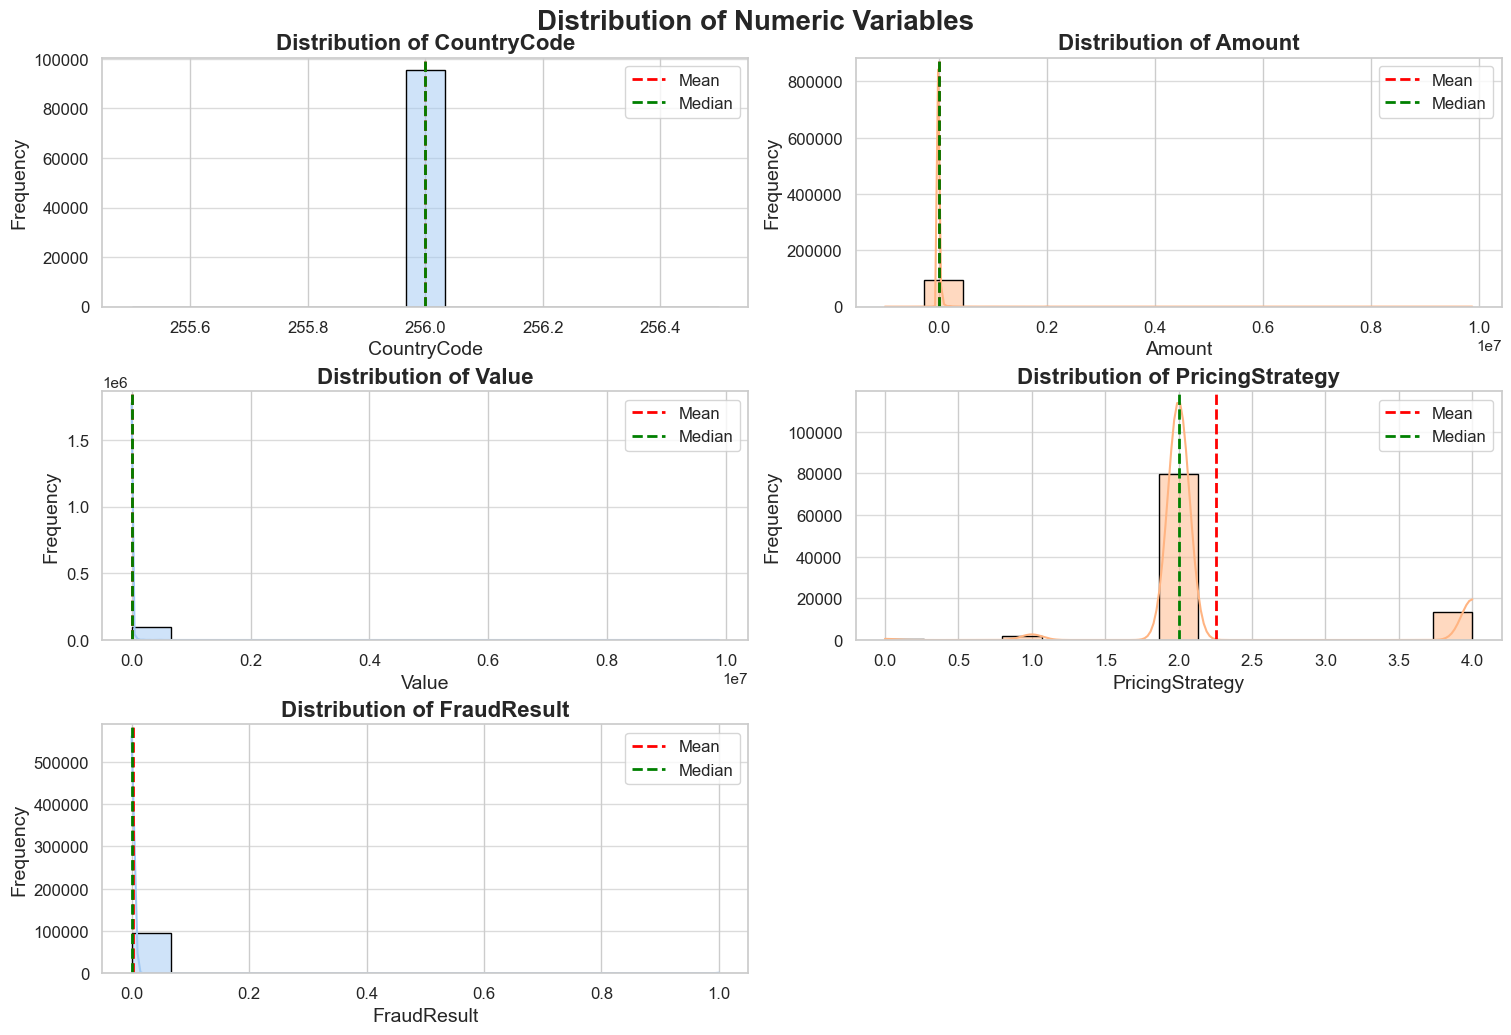

2025-06-27 08:30:45,271 - INFO - ✅ The distribution plot has been successfully completed.


In [14]:
# Logger activity
logger.info("🟢 Starting to plot numerical distribution...")
print("============================================================================================================================")

# List of numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
logger.info(f"Identified numeric columns: {numeric_cols}")

# Plot distribution
cr_eda.plot_numerical_distribution(numeric_cols)

logger.info("✅ The distribution plot has been successfully completed.")

2025-06-27 08:31:05,606 - INFO - 🟢 Starting the visualization of skewness for numerical features...


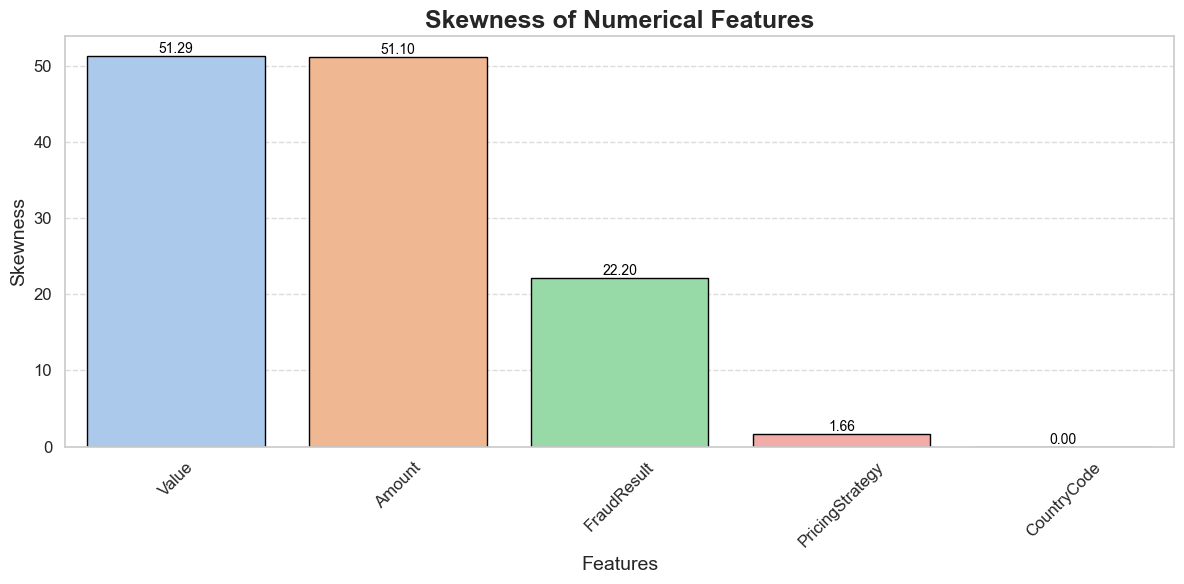

2025-06-27 08:31:05,830 - INFO - ✅ Skewness visualization completed successfully.
2025-06-27 08:31:05,831 - INFO - All visualization processes have been completed.


In [15]:
# Logger activity
logger.info("🟢 Starting the visualization of skewness for numerical features...")
print("============================================================================================================================")

if not df.empty:
    cr_eda.plot_skewness()
    
    logger.info("✅ Skewness visualization completed successfully.")
else:
    logger.warning("The DataFrame is empty. No numerical features to visualize.")

logger.info("All visualization processes have been completed.")

2025-06-27 08:34:47,747 - INFO - 🟢 Starting the visualization of categorical feature distributions...


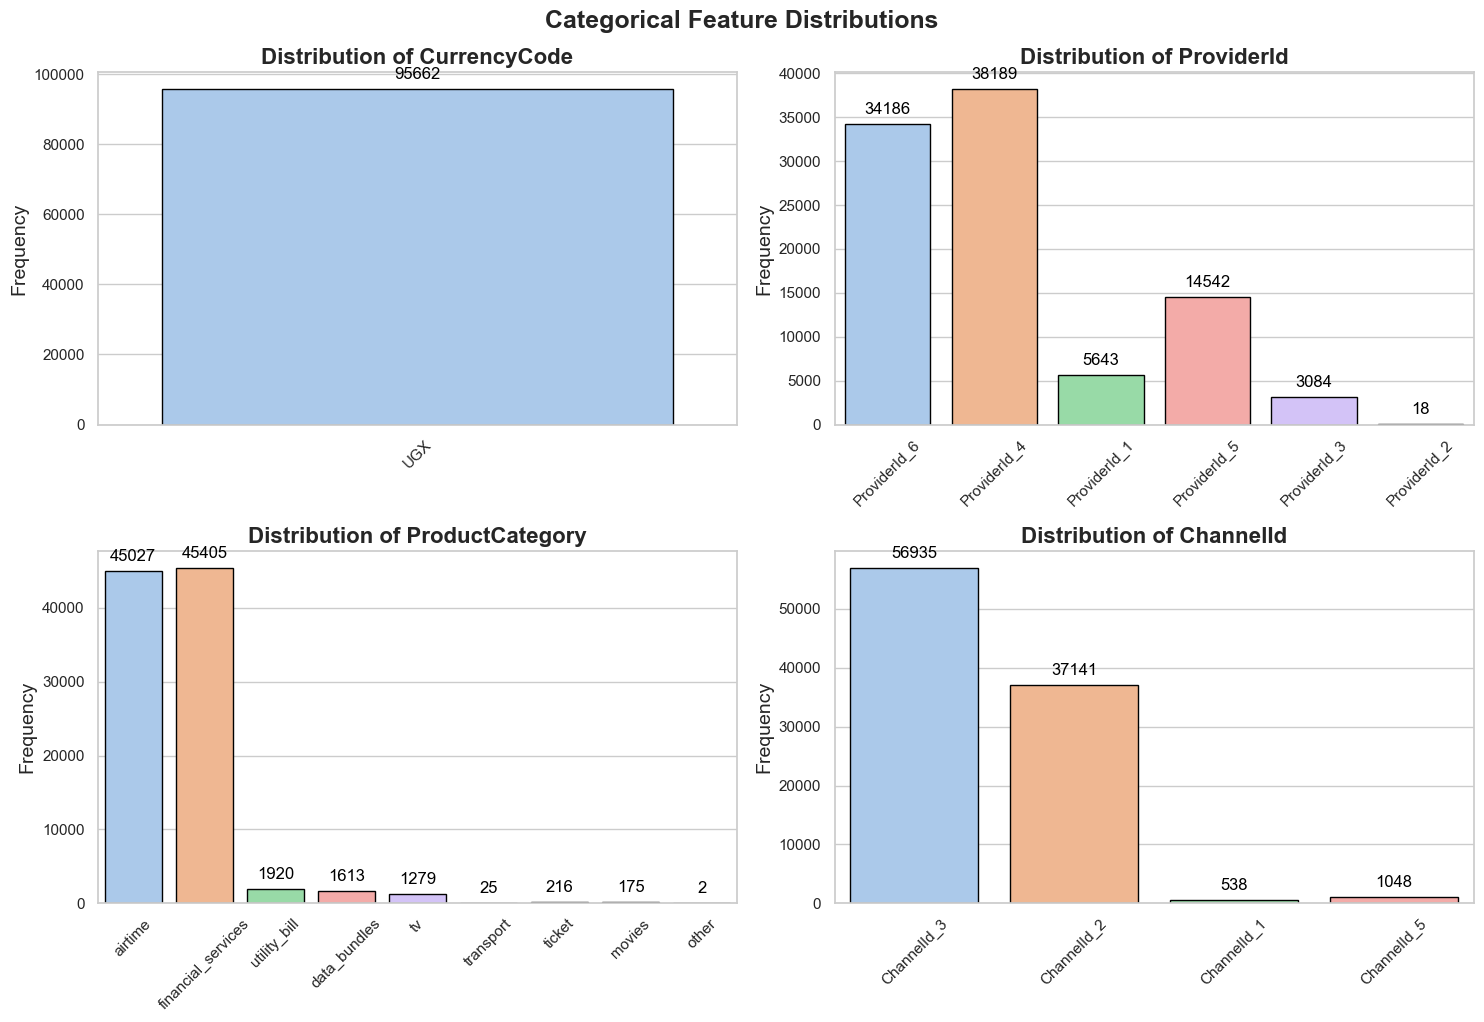

2025-06-27 08:34:49,471 - INFO - ✅ Categorical feature distribution plot completed successfully.
2025-06-27 08:34:49,472 - INFO - All visualization processes have been finished.


In [16]:


# Logger activity
logger.info('🟢 Starting the visualization of categorical feature distributions...')
print("============================================================================================================================")

if not df.empty:
    cr_eda.plot_categorical_distribution()
    logger.info('✅ Categorical feature distribution plot completed successfully.')
else:
    logger.warning('The DataFrame is empty. No categorical features to visualize.')

logger.info('All visualization processes have been finished.')



# Correlation Analysis

In [17]:


import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Selected numerical columns for correlation analysis:", numerical_cols.tolist())

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()
print("Calculated the correlation matrix.")



Selected numerical columns for correlation analysis: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
Calculated the correlation matrix.


Using a pastel color palette for the heatmap.


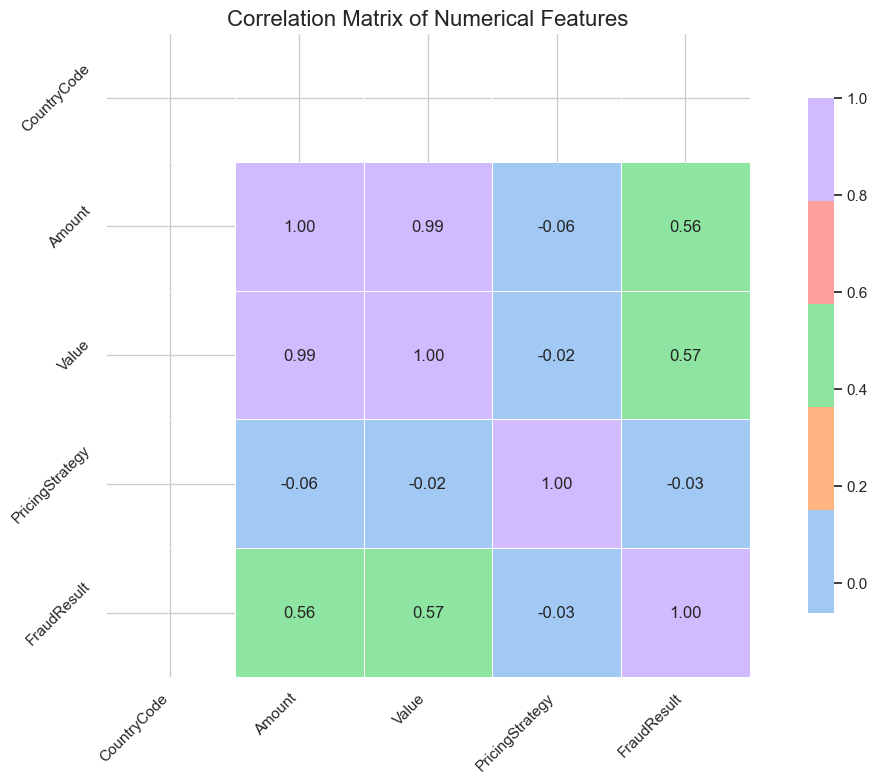

✅ Displayed the correlation matrix heatmap.


In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Define a custom pastel color palette
pastel_colors = sns.color_palette("pastel", n_colors=len(numerical_cols))
print("Using a pastel color palette for the heatmap.")
print(
    "============================================================================================================================"
)

# Draw the heatmap with the custom pastel colors
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=pastel_colors,
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
)

# Title and labels
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
print("✅ Displayed the correlation matrix heatmap.")
print(
    "============================================================================================================================"
)

## Identifying Missing Values

In [20]:
       # Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())
print(
    "============================================================================================================================"
)

# Identify missing values
missing_values = df.isnull().sum()

# Check if there are any missing values
if missing_values.any():
    missing_percentage = (missing_values / len(df)) * 100

    # Create a DataFrame to summarize missing values
    missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

    # Display the missing values summary
    print("Missing values summary:")
    print(missing_summary)
    print(
        "============================================================================================================================"
    )
else:
    print("✅ No missing values found in the dataset.")
    print(
        "============================================================================================================================"
    )
    

First few rows of the dataset:
                            BatchId       AccountId       SubscriptionId  \
TransactionId                                                              
TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
TransactionId_380    BatchId_102363   AccountId_648  SubscriptionId_2185   
TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

                          CustomerId CurrencyCode  CountryCode    ProviderId  \
TransactionId                                                                  
TransactionId_76871  CustomerId_4406          UGX          256  ProviderId_6   
TransactionId_73770  CustomerId_4406          UGX          256  ProviderId_4   
TransactionId_26203  CustomerId_4683          UGX          256  ProviderId_6   
TransactionId_380     CustomerId_988

 # Outlier Detection

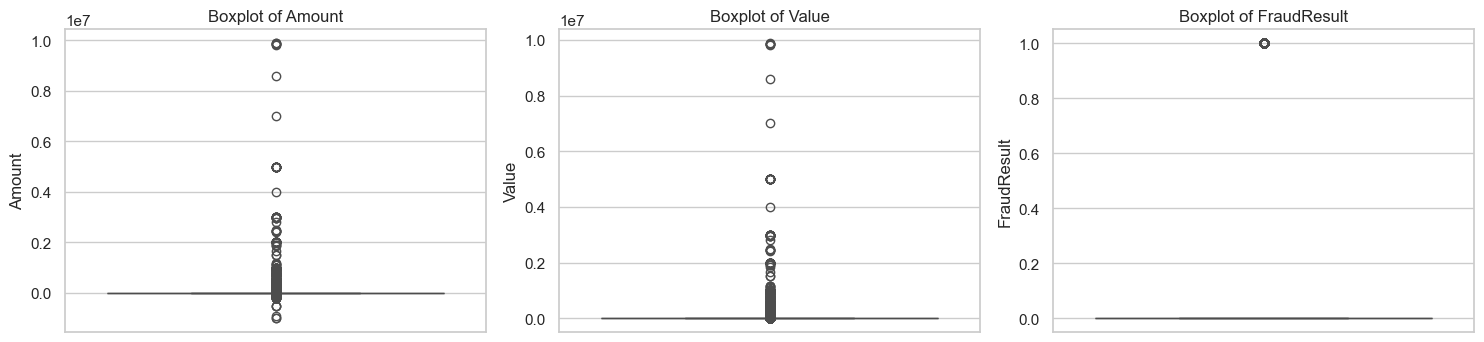

✅ Boxplots displayed for outlier detection.


In [21]:
cr_eda.detect_outliers(['Amount', 'Value', 'FraudResult'])

### Box plot

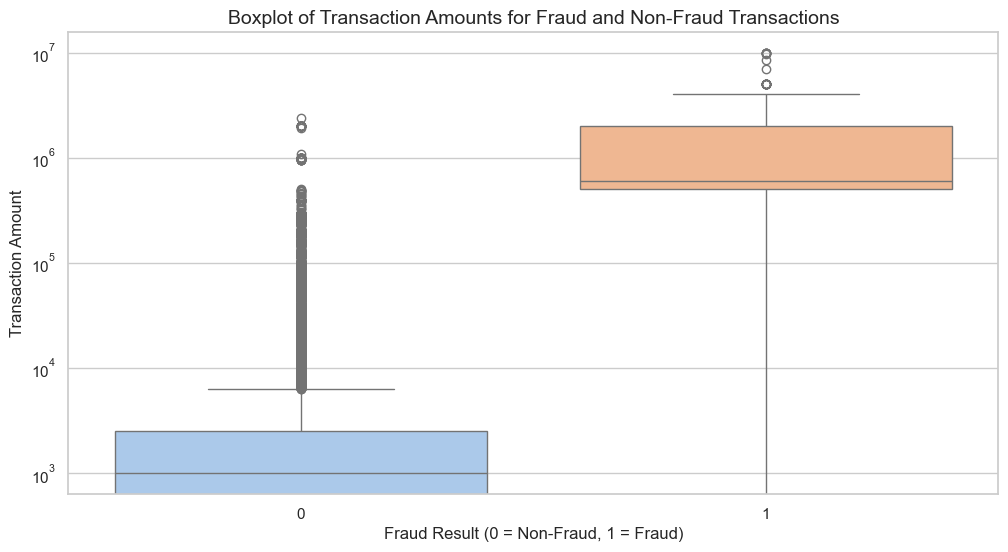

✅ Boxplot displayed successfully.
The boxplot compares transaction amounts between fraudulent and non-fraudulent transactions.
Note: A logarithmic scale is used for the y-axis to better visualize the distribution of amounts.


In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# Creating a plot to visualize the relationship between Amount and FraudResult
plt.figure(figsize=(12, 6))

# Plotting boxplot to compare Amount for FraudResult = 1 (fraudulent) and FraudResult = 0 (non-fraudulent)
sns.boxplot(x='FraudResult', y='Amount', hue='FraudResult', legend=False, data=df, palette="pastel")

# Adding appropriate titles and labels
plt.title('Boxplot of Transaction Amounts for Fraud and Non-Fraud Transactions', fontsize=14)
plt.xlabel('Fraud Result (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.yscale('log')  # Using log scale to handle the large range of amounts

# Show the plot
plt.show()

# Print statements for clarity
print("✅ Boxplot displayed successfully.")
print("The boxplot compares transaction amounts between fraudulent and non-fraudulent transactions.")
print("Note: A logarithmic scale is used for the y-axis to better visualize the distribution of amounts.")

